<h1>Desafío 1:Preparación del ambiente de trabajo<h1>

Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas de álbumes.

* Las imágenes se encuentran en una carpeta con el nombre ​album_covers​.
* Cada imagen tiene la siguiente nomenclatura: ​artista-nombre-​del​-album.jpg​.

El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores. Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:

* Comencemos por incluir las librerías clásicas: ​pandas​, ​numpy​ y ​matplotlib.pyplot​.
* sklearn.cluster.KMeans​: para extraer los principales componentes de una matriz numérica.
* skimage.io​: Para poder ingresar y leer imágenes.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from skimage import io
%matplotlib inline

<h1> Desafío 2: Importación de imágenes

* Comencemos por ingresar una imagen a nuestro ambiente de trabajo. Para ello ocuparemos ​io.imread​. ¿Qué devuelve?
* Para visualizar la imagen en el notebook, ocupe ​io.imshow

In [27]:
imagen1 = io.imread("C:/Users/javit/OneDrive/Escritorio/Mineria de datos 2/Clase 28-04/Tarea 2/Caratulas/alt-j-this-is-all-yours.jpg")
imagen1

array([[[239, 238, 244],
        [239, 238, 244],
        [239, 238, 244],
        ...,
        [244, 243, 249],
        [244, 243, 249],
        [244, 243, 249]],

       [[239, 238, 244],
        [239, 238, 244],
        [239, 238, 244],
        ...,
        [244, 243, 249],
        [244, 243, 249],
        [244, 243, 249]],

       [[239, 238, 244],
        [239, 238, 244],
        [239, 238, 244],
        ...,
        [244, 243, 249],
        [244, 243, 249],
        [244, 243, 249]],

       ...,

       [[167, 130, 161],
        [166, 129, 160],
        [166, 129, 160],
        ...,
        [237, 235, 240],
        [239, 237, 242],
        [238, 236, 241]],

       [[166, 131, 163],
        [165, 130, 162],
        [165, 130, 162],
        ...,
        [232, 230, 235],
        [238, 236, 241],
        [240, 238, 243]],

       [[166, 131, 163],
        [165, 130, 162],
        [165, 130, 162],
        ...,
        [227, 225, 230],
        [236, 234, 239],
        [241, 239, 244]]

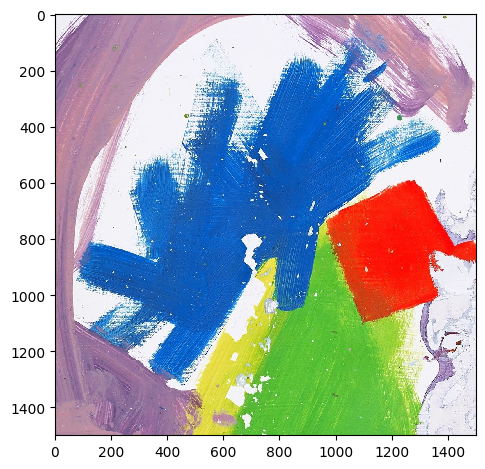

In [28]:
io.imshow("C:/Users/javit/OneDrive/Escritorio/Mineria de datos 2/Clase 28-04/Tarea 2/Caratulas/alt-j-this-is-all-yours.jpg")

<h1>Desafío 3: Preprocesamiento de imágenes y KMeans

* Con la representación numérica de la imagen, vamos a extraer la altura, el ancho y la cantidad de canales mediante ​shape​.
* Posteriormente redimensionaremos la imagen con reshape.
* Partamos por inicializar nuestro algoritmo ​KMeans​ con un ​k=​8​, ¿Qué significa esto?
* Vuelva a implementar el mismo algoritmo con ​MiniBatchKMeans​. ¿Qué diferencia existe con ​KMeans​?

In [35]:
(h,w,c) = imagen1.shape
img2D = imagen1.reshape(h*w,c)
print (img2D) 
print (img2D.shape)

[[239 238 244]
 [239 238 244]
 [239 238 244]
 ...
 [227 225 230]
 [236 234 239]
 [241 239 244]]
(2250000, 3)


In [39]:
from sklearn.cluster import KMeans 
kmeans_model = KMeans(n_clusters= 8, random_state= 7098)
cluster_labels = kmeans_model.fit_predict(img2D)

c:\Users\javit\Envs\MDD\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
pd.Series(cluster_labels).value_counts()

1    612576
6    535293
2    335425
5    246512
0    203564
4    149395
7     90358
3     76877
dtype: int64

In [44]:
from sklearn.cluster import MiniBatchKMeans
mini_model = MiniBatchKMeans(n_clusters=8 , random_state= 7098)
mini_cluster_labels = mini_model.fit_predict(img2D)
mini_cluster_labels

c:\Users\javit\Envs\MDD\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 3, 3, 3])

In [43]:
pd.Series(mini_cluster_labels).value_counts()

3    610486
1    577293
0    347620
7    226768
6    213578
2    149464
5     74058
4     50733
dtype: int64